# Variance Example
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/variance_example.ipynb)

This example demonstrates how the variance of your data will change with sample period and sample frequency.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
print('IN_COLAB = ' + str(IN_COLAB))

IN_COLAB = False


Now that we are done loading the modules we will need, let's get on to the actually interesting code.

First, we want to load the data and convert the units from hours to days.

In [3]:
if IN_COLAB:
    !wget https://github.com/eabarnes1010/course_objective_analysis/raw/main/data/homework_1_data_Y1.csv
    X = np.genfromtxt("homework_1_data_Y1.csv", delimiter = ',')
else:
    filename = '../data/homework_1_data_Y1.csv'
    X = np.genfromtxt(filename, delimiter = ',')

xindex = (np.arange(0,np.size(X),1))/24.

np.shape(X)

(16041,)

Next, we plot a timeseries of the hourly data.

Std: 20.163


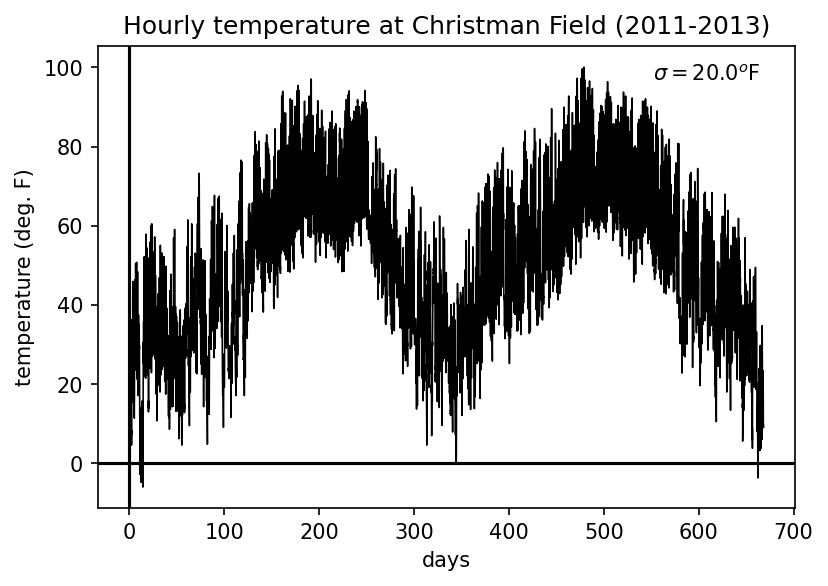

In [4]:
plt.figure()
plt.plot(xindex,X, linewidth = 0.75, color = 'black')

v = np.std(X)
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', 
         transform=plt.gca().transAxes, color = 'k')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.ylabel('temperature (deg. F)')
plt.xlabel('days')
plt.title('Hourly temperature at Christman Field (2011-2013)')

print("Std:" , round(v, 3))
plt.show()

This hourly data has a standard deviation of $20.0$F, or a variance of $20.^2 = 400.0$.

Next, let's see what happens to the variance when we only sample the data once a day (that is, make it daily data).

Std: 20.57


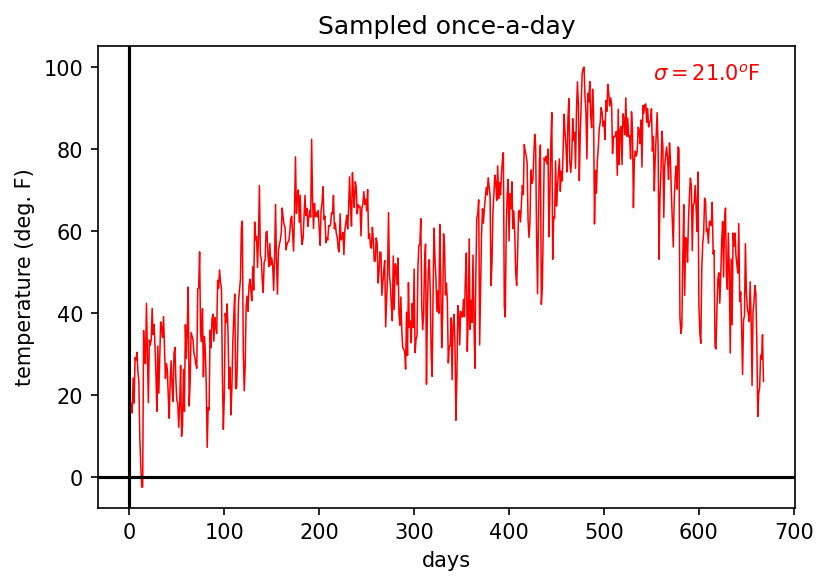

In [5]:
plt.figure()
plt.plot(xindex[::24],X[::24], linewidth = 0.74, color = 'red')

v = np.std(X[::24])
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', 
         transform=plt.gca().transAxes, color = 'red')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')

plt.ylabel('temperature (deg. F)')
plt.xlabel('days')

plt.title('Sampled once-a-day')

print("Std:" , round(v, 3))
plt.show()

Now the data has a standard deviation of $21.0^{\circ}$F, which is slightly larger than what the hourly data had. Let's repeat this exercise again but with monthly data (defined here as 30-day data).

Std: 19.956


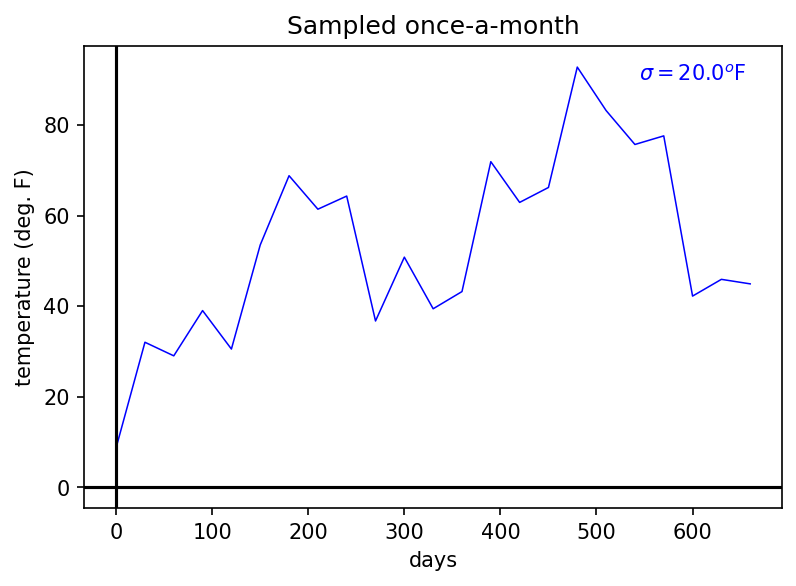

In [6]:
plt.figure()
plt.plot(xindex[::720],X[::720], linewidth = 0.74, color = 'blue')

v = np.std(X[::720])
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', 
         transform=plt.gca().transAxes, color = 'blue')

plt.axhline(y=0, color = 'black')
plt.axvline(x=0, color = 'black')
plt.ylabel('temperature (deg. F)')
plt.xlabel('days')

plt.title('Sampled once-a-month')

print("Std:" , round(v, 3))
plt.show()

The data once again has a standard deviation of $20.0^{\circ}$F, although the data looks a lot different. Let's do this again, but now with daily data over one month only.

Std: 6.568


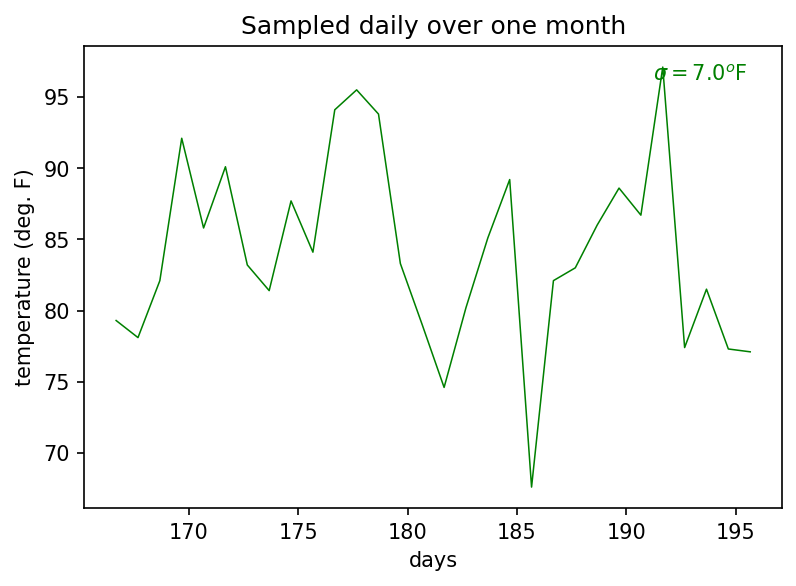

In [7]:
plt.figure()
plt.plot(xindex[4000:4000+720:24],X[4000:4000+720:24], linewidth = 0.74, color = 'green')

v = np.std(X[4000:4000+720:24])
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', 
         transform=plt.gca().transAxes, color = 'green')

plt.ylabel('temperature (deg. F)')
plt.xlabel('days')

plt.title('Sampled daily over one month')

print("Std:" , round(v, 3))
plt.show()

The standard deviation drops drastically down to $7.0^{\circ}$F. Why is this? It is because we are no longer sampling the seasonal cycle, which caused the large standard deviation in the previous examples.

If this is the case, what about sampling hourly over a single day? 

Std: 9.61


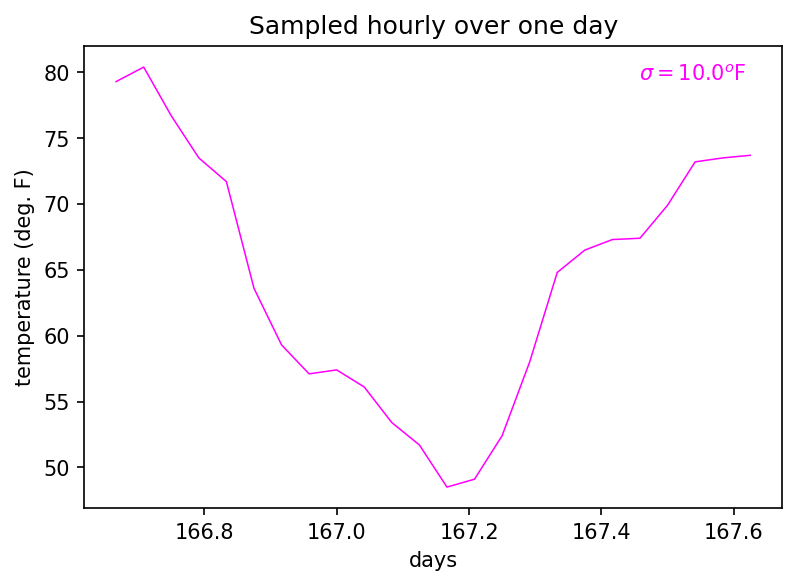

In [8]:
plt.figure()
plt.plot(xindex[4000:4000+24:1],X[4000:4000+24:1], linewidth = 0.74, color = 'magenta')

v = np.std(X[4000:4000+24:1])
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', 
         transform=plt.gca().transAxes, color = 'magenta')

plt.ylabel('temperature (deg. F)')
plt.xlabel('days')

plt.title('Sampled hourly over one day')

print("Std:" , round(v, 3))
plt.show()

We see that the standard deviation is a bit higher than for the previous case. This is because hourly variations within a day (the diurnal cycle) is actually a bit larger in than daily variations in the temperature across a single month. 

### Take-home point
The big point here is that the variance (or standard deviation) of your data is highly dependent on the sampling frequency you choose. So, "temperature at Christmas field" does not have a specific variance - one needs to specify the sampling rate and the period over which the sample was collected.